In [ ]:
import sys
import os

sys.path.append(os.path.abspath("../DP/Env"))
sys.path.append(os.path.abspath("../DP/Algorithms/"))

from Inventory import InventoryEnv
from value_iteration import value_iteration


In [8]:
# 1. Definimos la demanda determinística para n períodos
demand = [4, 7, 3, 6, 2, 5]

# 2. Fijamos los parámetros del almacén
capacity         = 15           # Capacidad máxima (unidades)
start_inventory  = 3            # Inventario inicial

# 3. Creamos la instancia
env = InventoryEnv(demand, capacity, start_inventory)
print(env)

InventoryEnv(Horizonte = 6, Capacidad = 15, #_Estados = 112)


In [9]:
opt_policy, V_opt = value_iteration(env)

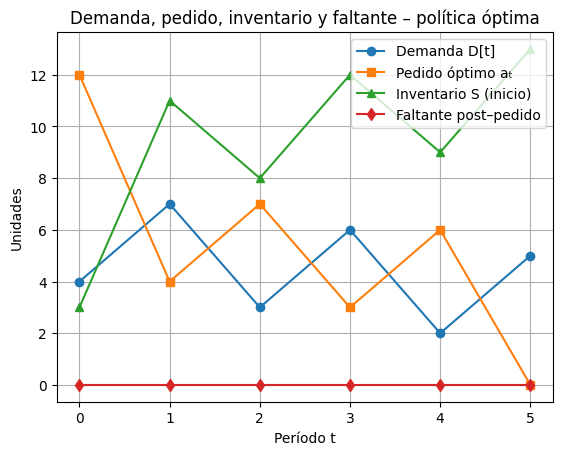

In [10]:
import matplotlib.pyplot as plt

# ---------------- Simular trayectoria completa -----------------------------
t, S = 0, env.start_inv

ts, demand_t, orders_t, invent_t, shortage_t = [], [], [], [], []

while t < env.n:
    ts.append(t)
    invent_t.append(S)

    d = env.D[t]
    demand_t.append(d)

    # Acción óptima (si falta, pedimos 0 para no fallar)
    a = opt_policy.get((t, S), 0)
    orders_t.append(a)

    # Shortage después de satisfacer con S+a
    shortage_t.append(max(0, d - (S + a)))

    # Avanzar un paso
    (t, S), _ = env.sim_step((t, S), a)

# ------------------- Única gráfica con las 4 series ------------------------
plt.figure()
plt.plot(ts, demand_t, marker='o', label='Demanda D[t]')
plt.plot(ts, orders_t, marker='s', label='Pedido óptimo aₜ')
plt.plot(ts, invent_t, marker='^', label='Inventario S (inicio)')
plt.plot(ts, shortage_t, marker='d', label='Faltante post–pedido')

plt.title("Demanda, pedido, inventario y faltante – política óptima")
plt.xlabel("Período t")
plt.ylabel("Unidades")
plt.legend()
plt.grid(True)
plt.show()